# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [7]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

In [8]:
 !pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


#### Important: Restart the Kernel before you move on to the next step.

In [9]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [10]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data
from torchvision import datasets, transforms

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [11]:
# Define transforms
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

# Create training set and define training dataloader
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [12]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


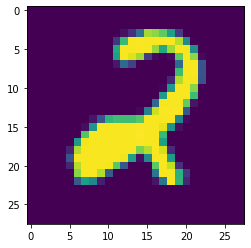

8


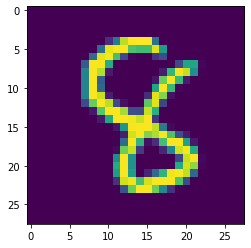

4


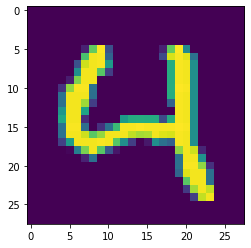

2


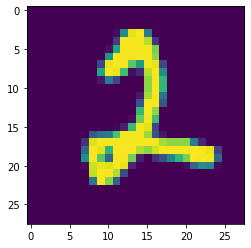

7


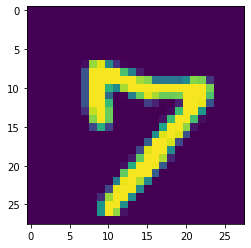

In [13]:
raw_transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the raw train dataset and define a DataLoader for it
raw_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=raw_transform)
raw_trainloader = torch.utils.data.DataLoader(raw_trainset, batch_size=5, shuffle=True)
show5(raw_trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
net = Net()
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [17]:
print(criterion)
print(optimizer)

CrossEntropyLoss()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Use device: {device}')

Use device: cuda


Plot the training loss (and validation loss/accuracy, if recorded).

In [19]:
epochs = 10
train_losses = []
accuracy_scores = []
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(epochs):
    running_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 250 == 249:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 250:.3f}')
            running_loss = 0.0

    train_losses.append(running_loss / len(trainloader))

    # Tính toán accuracy
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    accuracy_scores.append(accuracy)
    print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')

print('Trainning successfully')

Epoch 1, Batch 250, Loss: 0.916
Epoch 1, Batch 500, Loss: 0.590
Epoch 1, Batch 750, Loss: 0.503
Epoch 1, Accuracy: 86.12%
Epoch 2, Batch 250, Loss: 0.407
Epoch 2, Batch 500, Loss: 0.369
Epoch 2, Batch 750, Loss: 0.323
Epoch 2, Accuracy: 91.32%
Epoch 3, Batch 250, Loss: 0.298
Epoch 3, Batch 500, Loss: 0.277
Epoch 3, Batch 750, Loss: 0.266
Epoch 3, Accuracy: 93.26%
Epoch 4, Batch 250, Loss: 0.236
Epoch 4, Batch 500, Loss: 0.248
Epoch 4, Batch 750, Loss: 0.243
Epoch 4, Accuracy: 93.61%
Epoch 5, Batch 250, Loss: 0.216
Epoch 5, Batch 500, Loss: 0.229
Epoch 5, Batch 750, Loss: 0.214
Epoch 5, Accuracy: 93.84%
Epoch 6, Batch 250, Loss: 0.209
Epoch 6, Batch 500, Loss: 0.198
Epoch 6, Batch 750, Loss: 0.202
Epoch 6, Accuracy: 94.76%
Epoch 7, Batch 250, Loss: 0.180
Epoch 7, Batch 500, Loss: 0.192
Epoch 7, Batch 750, Loss: 0.176
Epoch 7, Accuracy: 94.83%
Epoch 8, Batch 250, Loss: 0.181
Epoch 8, Batch 500, Loss: 0.174
Epoch 8, Batch 750, Loss: 0.167
Epoch 8, Accuracy: 94.85%
Epoch 9, Batch 250, Loss

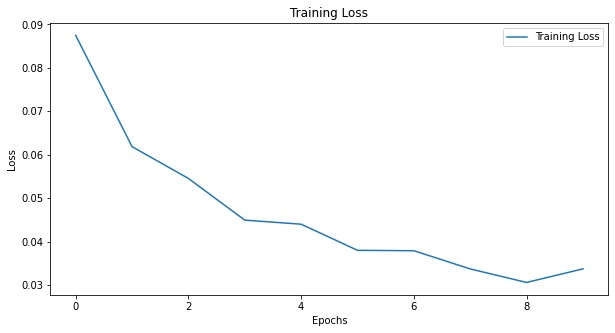

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [21]:
correct = 0
total = 0

net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'accuracy: {accuracy:.2f}%')

if accuracy >= 90:
    print("Great work, your model has a high accuracy!")
else:
    print("Your model's accuracy is below 90%. Consider revising your model architecture, loss function, or optimizer.")


accuracy: 95.34%
Great work, your model has a high accuracy!


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [22]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [23]:
class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Use device: {device}')
net = ImprovedNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Use device: cuda


In [25]:
epochs = 10
train_losses = []
val_losses = []
accuracy_scores = []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 250 == 249:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 250:.3f}')
            running_loss = 0.0

    train_losses.append(running_loss / len(trainloader))

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(testloader))
    accuracy_scores.append(100 * correct / total)

    print(
        f'Epoch {epoch + 1}, Validation Loss: {val_loss / len(testloader):.3f}, Accuracy: {100 * correct / total:.2f}%')

print('Trainning successfully')

Epoch 1, Batch 250, Loss: 1.297
Epoch 1, Batch 500, Loss: 0.821
Epoch 1, Batch 750, Loss: 0.746
Epoch 1, Validation Loss: 0.432, Accuracy: 85.38%
Epoch 2, Batch 250, Loss: 0.665
Epoch 2, Batch 500, Loss: 0.632
Epoch 2, Batch 750, Loss: 0.621
Epoch 2, Validation Loss: 0.361, Accuracy: 88.52%
Epoch 3, Batch 250, Loss: 0.579
Epoch 3, Batch 500, Loss: 0.561
Epoch 3, Batch 750, Loss: 0.557
Epoch 3, Validation Loss: 0.313, Accuracy: 90.27%
Epoch 4, Batch 250, Loss: 0.532
Epoch 4, Batch 500, Loss: 0.536
Epoch 4, Batch 750, Loss: 0.512
Epoch 4, Validation Loss: 0.316, Accuracy: 90.12%
Epoch 5, Batch 250, Loss: 0.509
Epoch 5, Batch 500, Loss: 0.513
Epoch 5, Batch 750, Loss: 0.496
Epoch 5, Validation Loss: 0.291, Accuracy: 90.97%
Epoch 6, Batch 250, Loss: 0.492
Epoch 6, Batch 500, Loss: 0.474
Epoch 6, Batch 750, Loss: 0.475
Epoch 6, Validation Loss: 0.265, Accuracy: 91.36%
Epoch 7, Batch 250, Loss: 0.470
Epoch 7, Batch 500, Loss: 0.467
Epoch 7, Batch 750, Loss: 0.464
Epoch 7, Validation Loss: 0.

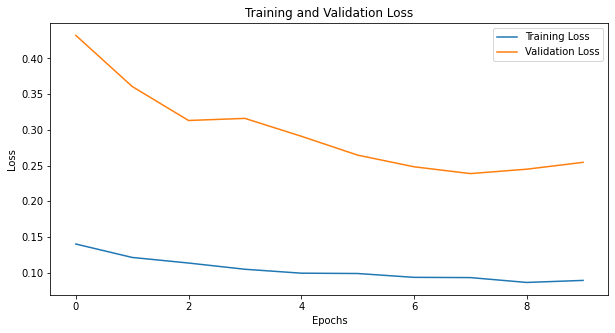

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

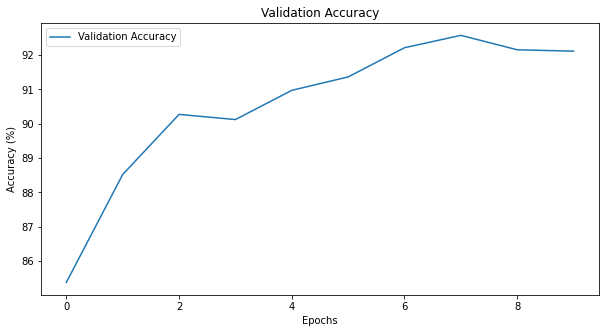

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(accuracy_scores, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Validation Accuracy')
plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [28]:
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)
print("Model save at path: ", PATH)

Model save at path:  ./mnist_net.pth


In [1]:
!rm -rf data

In [3]:
!jupyter nbconvert --to html *.ipynb

[NbConvertApp] Converting notebook MNIST_Handwritten_Digits-STARTER.ipynb to html
[NbConvertApp] Writing 450916 bytes to MNIST_Handwritten_Digits-STARTER.html
